<a href="https://colab.research.google.com/github/mohamedalaouiysf/ProjetAi/blob/main/CardiovascularDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problématique**

Entraîner des modèles de machine learning afin de prédire si un patient est susceptible de développer une maladie cardiovasculaire en fonction de ses caractéristiques personnelles et de son mode de vie.

### **Dataset**

Il s'agit d'un ensemble de données médicales qui contient des informations sur des patients atteints de maladies cardiovasculaires et sur des patients en bonne santé.

Le jeu de données contient les caractéristiques suivantes pour chaque patient:

- age : l'âge du patient en années
- gender : le sexe du patient (1 = femme, 2 = homme)
- height : la taille du patient en centimètres
- weight : le poids du patient en kilogrammes
- ap_hi : la pression artérielle systolique du patient
- ap_lo : la pression artérielle diastolique du patient
- cholesterol : le taux de cholestérol du patient (1 = normal, 2 = élevé, 3 = très élevé)
- gluc : le taux de glucose du patient (1 = normal, 2 = élevé, 3 = très élevé)
- smoke : indique si le patient fume ou non (0 = non-fumeur, 1 = fumeur)
- alco : indique si le patient consomme de l'alcool ou non (0 = non-alcoolique, 1 = alcoolique)
- active : indique si le patient pratique une activité physique régulière ou non (0 = non-actif, 1 = actif)
- cardio : indique si le patient a une maladie cardiovasculaire ou non (0 = non, 1 = oui)
Il y a 70 000 enregistrements dans ce jeu de données.

Entraîner des modèles de machine learning afin de prédire si un patient est susceptible de développer une maladie cardiovasculaire en fonction de ses caractéristiques personnelles et de son mode de vie.

### **Formalisation du problème**

Le problème peut être formalisé comme suit :

> Soit ***X*** l'espace des caractéristiques d'un patient telles que ***X = {x_1, x_2, ..., x_n}*** où n est le nombre de caractéristiques disponibles pour chaque patient. Chaque caractéristique est représentée par une valeur numérique ou catégorique.

> Soit ***Y*** l'espace des étiquettes de classe, où ***Y = {0, 1}***. La valeur de Y est égale à 1 si le patient est atteint d'une maladie cardiovasculaire et 0 sinon.

> Soit ***D = {(x_1, y_1), (x_2, y_2), ..., (x_m, y_m)}*** l'ensemble de données d'entraînement, où m est le nombre total de patients dans l'ensemble de données. Chaque exemple d'entraînement ***(x_i, y_i)*** est une paire de caractéristiques et d'étiquettes de classe correspondantes.

Le problème consiste à apprendre une fonction de décision ***f : X → Y*** qui peut prédire avec précision si un patient donné est atteint d'une maladie cardiovasculaire ou non. En d'autres termes, nous voulons trouver une fonction **f** qui minimise l'erreur de prédiction sur l'ensemble de données d'entraînement **D**, tout en généralisant bien sur des données inconnues.

### **Methodologie et Protocole**


*   Exploration des données : analyse des caractéristiques disponibles et leur distribution, examen des valeurs manquantes, des valeurs aberrantes et des corrélations entre les variables.
*   Prétraitement des données : nettoyage des données, traitement des valeurs manquantes et des valeurs aberrantes, normalisation des données si nécessaire.
*   Sélection des modèles : décision d'utiliser des arbres de décision, des random forests, une régression logistique et Naive Bayess classifieur, en fonction des caractéristiques de l'ensemble de données et des objectifs de l'analyse.
*   Evaluation des modèles : utilisation de métriques telles que le rappel pour évaluer la performance des modèles sur un jeu de données de test (Hold-out), en utilisant une proportion de 70% pour l'entraînement et 30% pour le test.
*   Validation croisée : utilisation d'une approche de validation croisée (k-fold cross-validation) pour sélectionner le meilleur modèle parmi tous les modèles évalués.
*   Optimisation du modèle : ajustement des hyperparamètres pour améliorer les performances du modèle sélectionné.
*   Test du modèle : évaluation finale des performances du modèle sélectionné

## **Importation**

In [ ]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import plotly.express as px
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/mohamedalaouiysf/ProjetAi/main/cardio_train.csv'
try:
  df = pd.read_csv(url, sep=";")
except:
    print("Error")
else:
    print("Data loaded")


Data loaded


In [ ]:
#copie pour traitements ultérieurs 
backup = df.copy(deep=True)

# **Exploration**

In [ ]:
df = df.set_index('id')
df.head(10)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   
8   21914       1     151    67.0    120     80            2     2      0   
9   22113       1     157    93.0    130     80            3     1      0   
12  22584       2     178    95.0    130     90            3     3      0   
13  17668       1     158    71.0    110     70            1     1      0   
14  19834       1     164    68.0    110     60            1     1      0   

    alco  active  cardio  
id                        
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0  
8      0       0       0  
9      0       1       0  
12     0       1       1  
13     0       1       0  
14     0       0       0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [ ]:
df.describe()

age        height        weight       high_bp        low_bp
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000
mean      53.338686    164.359229     74.205690    128.817286     96.630414
std        6.765294      8.210126     14.395757    154.011419    188.472530
min       30.000000     55.000000     10.000000   -150.000000    -70.000000
25%       48.000000    159.000000     65.000000    120.000000     80.000000
50%       54.000000    165.000000     72.000000    120.000000     80.000000
75%       58.000000    170.000000     82.000000    140.000000     90.000000
max       65.000000    250.000000    200.000000  16020.000000  11000.000000

In [ ]:
#données manquantes
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Transformation

In [ ]:
# Rendre les valeurs de notre dataset plus parlantes 
#creation de dictionnaires pour codifier les valeurs de notre dataset en echelles/binaire(yes, no) 
cholesterol_dict = {1: 'normal', 2: 'above normal', 3: 'well above normal'}
glucose_dict={1: 'normal', 2: 'above average', 3: 'well above normal'}
smoking_dict={0:'no',1:'yes'}
alcohol_dict={0:'no',1:'yes'}
active_dict={0:'no',1:'yes'}
cvd_dict={0:'no',1:'yes'}
gender_dict={1:'female',2:'male'}

# on remplace par les valeurs definies dans les dictionnaires ci-dessus 
df['cholesterol'] = df['cholesterol'].replace(cholesterol_dict)
df['gluc'] = df['gluc'].replace(glucose_dict)
df['smoke'] = df['smoke'].replace(smoking_dict)
df['alco'] = df['alco'].replace(alcohol_dict)
df['active'] = df['active'].replace(active_dict)
df['cardio'] = df['cardio'].replace(cvd_dict)
df['gender'] = df['gender'].replace(gender_dict)

#transformer l'age en année
df['age'] = (df['age']/365).round().astype('int')

#changer ap_hi et ap_low en high blood pressure (high_bp) et low blood pressure (low_bp) car plus simple à comprendre
df.rename(columns={'ap_hi': 'high_bp', 'ap_lo': 'low_bp'}, inplace=True) 

#rendre les colonnes ci-dessous categoriques 
df['cholesterol'] = df['cholesterol'].astype('category')
df['gluc'] = df['gluc'].astype('category')
df['smoke'] = df['smoke'].astype('category')
df['alco'] = df['alco'].astype('category')
df['active'] = df['active'].astype('category')
df['cardio'] = df['cardio'].astype('category')

print("Rendre les valeurs de notre dataset plus parlantes:")
df.head(10)



Rendre les valeurs de notre dataset plus parlantes:


age  gender  height  weight  high_bp  low_bp        cholesterol  \
id                                                                    
0    50    male     168    62.0      110      80             normal   
1    55  female     156    85.0      140      90  well above normal   
2    52  female     165    64.0      130      70  well above normal   
3    48    male     169    82.0      150     100             normal   
4    48  female     156    56.0      100      60             normal   
8    60  female     151    67.0      120      80       above normal   
9    61  female     157    93.0      130      80  well above normal   
12   62    male     178    95.0      130      90  well above normal   
13   48  female     158    71.0      110      70             normal   
14   54  female     164    68.0      110      60             normal   

                 gluc smoke alco active cardio  
id                                              
0              normal    no   no    yes     no  
1              normal    no   no    yes    yes  
2              normal    no   no     no    yes  
3              normal    no   no    yes    yes  
4              normal    no   no     no     no  
8       above average    no   no     no     no  
9              normal    no   no    yes     no  
12  well above normal    no   no    yes    yes  
13             normal    no   no    yes     no  
14             normal    no   no     no     no

In [ ]:
#Apres transformation
df.describe()

age        height        weight       high_bp        low_bp
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000
mean      53.338686    164.359229     74.205690    128.817286     96.630414
std        6.765294      8.210126     14.395757    154.011419    188.472530
min       30.000000     55.000000     10.000000   -150.000000    -70.000000
25%       48.000000    159.000000     65.000000    120.000000     80.000000
50%       54.000000    165.000000     72.000000    120.000000     80.000000
75%       58.000000    170.000000     82.000000    140.000000     90.000000
max       65.000000    250.000000    200.000000  16020.000000  11000.000000

# **Visualisation des données** 

**Nombre de personnes malades**

---



In [ ]:
df.cardio.value_counts()

no     35021
yes    34979
Name: cardio, dtype: int64

In [ ]:
import plotly.express as px

# Get the count of sick vs not sick people
counts = df["cardio"].value_counts()

# Create a vertical bar chart
fig = px.bar(x=["Pas Malade", "Malade"], y=counts.values, color=["green", "red"],
             orientation='v', title="Nombre des personnes Malades vs Pas Malade")

# Set the axis labels
fig.update_xaxes(title_text="Malade / Pas Malade")
fig.update_yaxes(title_text="Count")

# Show the plot
fig.show()



> Le nombre des personnes atteintes de maladies cardiovasculaires est presque le même que les personnes saines.











**Maladie Cardiovasculaire par age**

---



In [ ]:
import plotly.express as px

fig = px.histogram(df, x="age", color="cardio", barmode="group",
                   color_discrete_sequence=px.colors.qualitative.Set3, opacity=0.7, nbins=len(df["age"].unique()))

fig.update_layout(title="Cardiovascular Disease by Age",
                  xaxis_title="Age (years)", yaxis_title="Count",
                  legend_title="Cardio", legend=dict(x=0.8, y=0.95))

fig.show()

print("0 = No Cardio, 1 = Cardio")


0 = No Cardio, 1 = Cardio


In [ ]:
fig = px.histogram(df, x='age', color='cardio',opacity=0.7, nbins=len(df['age'].unique()), 
                   color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(title_text='Maladie Cardiovasculaire par Age',
                  xaxis_title_text='Age (années)',
                  yaxis_title_text='Count')

fig.show()


> Les personnes plus agées sont atteintes de maladies cardiovasculaires plus que les plus jeunes. On peut dire alors que les plus âgés sont plus susceptibles d’être atteinte par les Maladies Cardiovasculaires.



**Maladie Cardiovasculaire par genre**


---



In [ ]:
import plotly.express as px

fig = px.histogram(df, x="gender", color="cardio", barmode="group",
                   color_discrete_sequence=px.colors.qualitative.Set2, opacity=0.7)

fig.update_layout(title="Maladie Cardiovasculaire par genre",
                  xaxis_title="Gender", yaxis_title="Count",
                  legend_title="Cardio", legend=dict(x=0.8, y=0.95))

fig.show()


In [ ]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
fig = px.histogram(df_long, x='variable', color='value', facet_col='cardio',
                   nbins=len(df_long['variable'].unique()), 
                   color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(title_text='Répartition des variables entre les individus en bonne santé et les individus affectés',
                  xaxis_title_text='Variables',
                  yaxis_title_text='Count')

fig.show()

> On remarque que les personnes malades ont des niveaux de cholestérol et de glucose superieurs aux personnes saines.




In [ ]:
import plotly.express as px
smoke_alco_counts = df.groupby(['cardio', 'smoke', 'alco']).size().reset_index(name='counts')
fig = px.bar(smoke_alco_counts, x='cardio', y='counts', color='smoke', barmode='stack', facet_col='alco', 
             title='Maladie Cardiovasculaire par Consommation Alcool et Tabac')
fig.show()

In [ ]:
# Compute the correlation matrix
corr = backup.corr()

# Create a heatmap using Plotly
fig = px.imshow(corr.values,
                x=corr.columns,
                y=corr.index,
                color_continuous_scale='RdBu',
                zmin=-1,
                zmax=1,
                title='Correlation Heatmap',
                labels=dict(x='Variable 1', y='Variable 2', color='Correlation'))

# Add annotations to the heatmap
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        fig.add_annotation(x=corr.columns[i], y=corr.index[j],
                           text=str(round(corr.iloc[j, i], 2)),
                           showarrow=False, font=dict(size=14))

# Configure the layout of the heatmap
fig.update_layout(width=800, height=800, title_x=0.5)

# Display the heatmap
fig.show()




> En examinant la heatmap, on peut voir que certaines variables sont fortement corrélées positivement entre elles, comme "height" et "weight", tandis que d'autres sont corrélées négativement, comme "age" et "actif". Cela signifie que lorsque l'une des variables augmente, l'autre variable a tendance à augmenter ou à diminuer également, respectivement.

> Il y a également des corrélations intéressantes entre la variable cible "cardio" et d'autres variables. Par exemple, "age" et "cholesterol" ont une corrélation positive relativement élevée avec "cardio", ce qui indique que les personnes plus âgées et celles ayant des niveaux de cholestérol plus élevés sont plus susceptibles d'avoir une maladie cardiovasculaire. En revanche, "actif" a une corrélation négative avec "cardio", ce qui indique que les personnes qui sont plus physiquement actives sont moins susceptibles d'avoir une maladie cardiovasculaire.





# **Arbre de decision** 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [ ]:
# Rendre les valeurs de notre dataset plus parlantes 
df2 = backup
#transformer l'age en année
df2['age'] = (df2['age']/365).round().astype('int')

#changer ap_hi et ap_low en high blood pressure (high_bp) et low blood pressure (low_bp) car plus simple à comprendre
df2.rename(columns={'ap_hi': 'high_bp', 'ap_lo': 'low_bp'}, inplace=True) 

#rendre les colonnes ci-dessous categoriques 
df2['gender'] = df2['gender'].astype('category')
df2['cholesterol'] = df2['cholesterol'].astype('category')
df2['gluc'] = df2['gluc'].astype('category')
df2['smoke'] = df2['smoke'].astype('category')
df2['alco'] = df2['alco'].astype('category')
df2['active'] = df2['active'].astype('category')
df2['cardio'] = df2['cardio'].astype('category')

In [ ]:
y =  df2.cardio
df2.columns

Index(['age', 'gender', 'height', 'weight', 'high_bp', 'low_bp', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')



> Selection des caracteristiques :











In [ ]:
features = ['age','gender', 'height', 'weight', 'high_bp', 'low_bp', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active']



> Representation des 70000 observations  :











In [ ]:
X = df2[features]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          70000 non-null  int64   
 1   gender       70000 non-null  category
 2   height       70000 non-null  int64   
 3   weight       70000 non-null  float64 
 4   high_bp      70000 non-null  int64   
 5   low_bp       70000 non-null  int64   
 6   cholesterol  70000 non-null  category
 7   gluc         70000 non-null  category
 8   smoke        70000 non-null  category
 9   alco         70000 non-null  category
 10  active       70000 non-null  category
dtypes: category(6), float64(1), int64(4)
memory usage: 3.6 MB




> Division de l'ensemble de données en ensemble d'entrainement et de tests (70% - 30%)











In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
clf = DecisionTreeClassifier()



> On utilise GridSearchCV pour trouver la meilleure valeur de max_depth pour notre classifieur 











In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [5,6,7,8,9,10,11,100]}
#Effectuer une recherche de grille avec validation croisée en utilisant GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
#Afficher le meilleur paramètre.
print("Meilleur parametre:", grid_search.best_params_)

Meilleur parametre: {'max_depth': 5}


In [ ]:
clf = DecisionTreeClassifier(max_depth=5)

# Entrainer le classifieur sur les donnees d'entrainement
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#Faire des predictions sur les données de tests 
predicted = clf.predict(X_test)



> Pour evaluer notre modele qui traite un cas de classification nous nous interessons aux métriques suivant:
TP  FP TN  FN .












In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_m = confusion_matrix(y_test,predicted)

In [ ]:
TP = confusion_m[0][0] 
TN = confusion_m[1][1]  
FP = confusion_m[0][1]  
FN = confusion_m[1][0]  
print("TP = ",TP)
print("TN = ",TN)
print("FP = ",FP)
print("FN = ",FN)

TP =  8705
TN =  6685
FP =  1786
FN =  3824


In [ ]:
#Visualiser notre matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_m)
disp.plot(cmap=plt.cm.Blues)
plt.show()



> Dans les classificateurs d'arbres de décision, l'accuracy  est une mesure de la performance du modèle sur un ensemble de données. 
Elle mesure la proportion d'instances correctement classées parmi toutes les instances dans l'ensemble de données .

Accuracy = TP + TN/TP + FN + TN + FP.












In [ ]:
# Tester le classificateur sur les données de test et afficher l'accuracy
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.7328571428571429




> Le modele a correctement predit 73% de nos donnes de test















> En effet, dans ce type de problème, il est crucial de minimiser le nombre de faux négatifs, c'est-à-dire les cas où le modèle prédit que le patient n'a pas de problème cardiovasculaire alors qu'il en a réellement un. Pour cela on s'interesse plus au rappel.
Un rappel élevé indique que le modèle est capable de détecter la majorité des cas positifs, ce qui est un objectif important en termes de santé. 













In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,predicted)
print("Le score de rappel est ",recall)

Le score de rappel est  0.6361214197354649




> Un score de rappel de 0.687 signifie que le modèle a correctement identifié 68.7% des cas positifs dans l'ensemble de test. Cela signifie que le modèle a réussi à détecter une grande partie des cas positifs, mais qu'il a également manqué certains cas.












In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predicted)
print("F1-score:", f1)

F1-score: 0.7044257112750263




> Un score F1 élevé indique que le modèle a à la fois une haute précision et un haut rappel, ce qui signifie qu'il est capable d'identifier correctement les instances positives tout en minimisant les faux positifs et les faux négatifs












In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, predicted)
auc_score = roc_auc_score(y_test, predicted)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC={:.2f})'.format(auc_score))
plt.legend(['Decision tree', 'Random Guessing'])
plt.show()



>On remarque que la surface sous la courbe est d'une valeur de 0,73 , cela signifie que notre classifieur n'est pas parfait mais beaucoup mieux qu'une performance aléatoire.
 












# **Random Forest** 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=100, random_state=0)

In [ ]:
clf2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred2=clf2.predict(X_test)

In [ ]:
# Évaluer la performance du modèle sur l'ensemble de test
accuracy = clf2.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7102857142857143


In [ ]:
confusion_m =confusion_matrix(y_test, y_pred2)

TP = confusion_m[0][0] 
TN = confusion_m[1][1]  
FP = confusion_m[0][1]  
FN = confusion_m[1][0]  
print("TP = ",TP)
print("TN = ",TN)
print("FP = ",FP)
print("FN = ",FN)

TP =  7480
TN =  7436
FP =  3011
FN =  3073


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_m)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
# y_test est la liste des vraies étiquettes de classe pour l'ensemble de test
# y_pred2 est la liste des prédictions du modèle pour l'ensemble de test

# Calculer la précision
precision2 = precision_score(y_test, y_pred2)

# Calculer le rappel
recall2 = recall_score(y_test, y_pred2)

# Calculer le F1-score
f12 = f1_score(y_test, y_pred2)

# Calculer l'AUC-ROC
auc_roc2 = roc_auc_score(y_test, y_pred2)

# Afficher les résultats
print("Precision: {:.2f}".format(precision2))
print("Recall: {:.2f}".format(recall2))
print("F1-score: {:.2f}".format(f12))
print("AUC-ROC: {:.2f}".format(auc_roc2))

Precision: 0.71
Recall: 0.71
F1-score: 0.71
AUC-ROC: 0.71


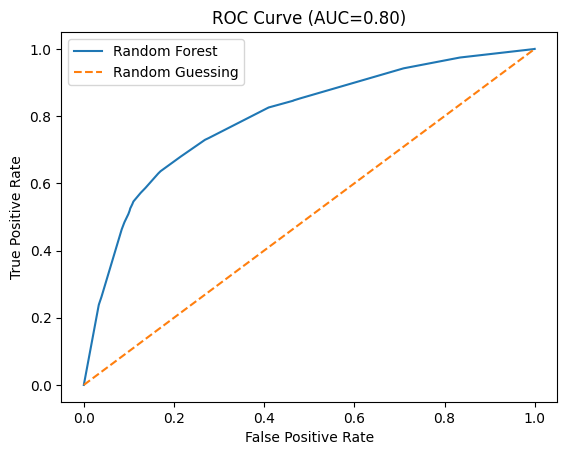

In [ ]:
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC={:.2f})'.format(auc_score))
plt.legend(['Random Forest', 'Random Guessing'])
plt.show()

# **Régression logistique** 

La régression logistique est souvent utilisée pour la classification binaire, où la variable dépendante est une variable binaire (0 ou 1). Dans ce cas, le modèle de régression logistique prédit la probabilité d'appartenance à la classe positive (1) ou négative (0) en fonction des variables indépendantes. Cette prédiction peut ensuite être convertie en une classe binaire en utilisant un seuil de classification (par exemple, 0,5). En particulier, la régression logistique est utile pour prédire une variable binaire, telle que la présence ou l'absence de maladie cardiovasculaire, en fonction de plusieurs variables explicatives. Dans ce cas, la variable dépendante est binaire (présence ou absence de maladie cardiovasculaire) et les variables indépendantes sont les caractéristiques de santé des patients.

In [ ]:
from sklearn.linear_model import LogisticRegression

Pour comprendre comment notre modèle utilise les différentes caractéristiques pour prédire la probabilité de présence de maladies cardiovasculaires chez un patient donné calculons le biais et les coefficients

In [ ]:
# fitting df1 data to the model
#maximum d'itérations = 10 000
logreg1 = LogisticRegression(max_iter=10000)
logreg1.fit(X_train, y_train)
#affichage du biais et du coefficients de votre modèle appris.
#les coefficients indiquent l'importance relative de chaque caractéristique dans la prédiction de la classe cible.
print(logreg1.intercept_)
print(logreg1.coef_)

[-7.99398795]
[[ 5.57650252e-02  4.08018870e-02 -6.38413442e-03  1.63352115e-02
   3.46088407e-02  4.28245223e-04  5.30015688e-01 -1.12553370e-01
  -1.40699083e-01 -1.50041750e-01 -2.10082222e-01]]


Le biais est représenté par -9.05954444. Cette valeur représente le point où la droite de régression coupe l'axe des ordonnées (y) lorsque toutes variables indépendantes (ou caractéristiques) sont nulles. Dans ce cas, cette valeur signifie que même si toutes les autres variables étaient nulles, la probabilité de présence de maladies cardiovasculaires serait relativement faible.

-Les coefficients correspondent à l'importance relative de chaque variable indépendante dans la prédiction de la variable cible. Plus un coefficient est grand (positif ou négatif), plus la variable correspondante est importante dans la prédiction.
-Par exemple le coefficient positif pour 'cholesterol'= 5.15855731e-01, signifie que des niveaux de cholestérol plus élevés sont associés à une probabilité accrue de maladies cardiovasculaires, tandis qu'un coefficient négatif pour une caractéristique, comme 'physical activity'= -2.16940853e-01, signifie que des niveaux d'activité physique plus élevés sont associés à une probabilité faible de maladies cardiovasculaires.

Pour evaluer notre modele qui traite un cas de classification nous nous interessons aux métriques suivant: TP FP TN FN .

In [ ]:
y3_pred = logreg1.predict(X_test)
# creating a confusion matrix
conf_mat = pd.crosstab(y_test, 
            y3_pred, 
            rownames=['Actual'], 
            colnames=['Predicted'])
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


*   TP = 7055 correctement prédit pour les cas ou la variable cible est positive.


* TN = 8092 correctement prédit pour les cas ou la variable cible est negatif.
*   FP = 2475 incorrectement prédit pour les cas ou la variable cible est positive.


*   FN = 3378 incorrectement prédit pour les cas ou la variable cible est negatif.


In [ ]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y3_pred))

Accuracy: 0.7182380952380952


le modèle a correctement prédit la classe de 72,13 % des échantillons de test.
Pour avoir des informations supplémentaires sur la performance du modèle on calculera F1 score et le rappel.

F1-score : 0.708
Rappel : 0.682


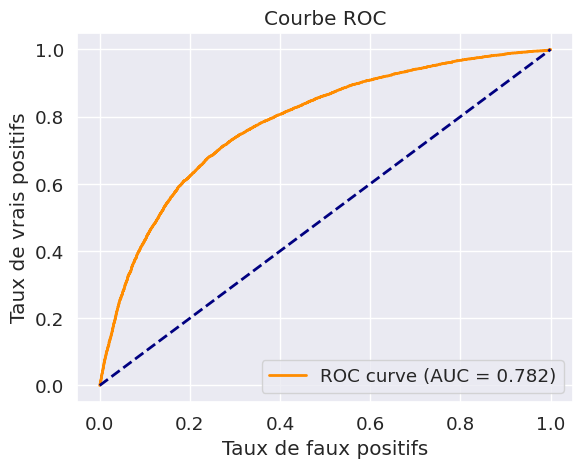

In [ ]:
# Calcul du F1-score et du rappel
f1 = f1_score(y_test, y3_pred)

recall = recall_score(y_test, y3_pred)

print("F1-score : {:.3f}".format(f1))
print("Rappel : {:.3f}".format(recall))

# Calcul de la courbe ROC et de l'AUC
y3_pred_proba = logreg1.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y3_pred_proba)
auc = roc_auc_score(y_test, y3_pred_proba)

# Tracé de la courbe ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.3f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

-le F1-score est égal à 0.707, ce qui indique que le modèle a une performance raisonnable pour la prédiction des maladies cardiovasculaires dans le jeu de données de test. 
-Le modèle a identifié environ 67,6 % des cas de maladies cardiovasculaires réels dans le jeu de données de test.

# **Naive bayes classifier** 

En considérant l'hypothèse d'indépendance conditionnelle (CIA), les classificateurs Naive Bayes approximent/estiment l'argmaxy∈Y P(X = x|Y = y) (Y= y) 
en utilisant l'expression suivante :
argmaxy∈Y P(Y = y) × ∏P(Xi = xi|Y = y)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#instancier le modèle
gnb = GaussianNB()
#entrainer le modèle
gnb.fit(X_train, y_train)

# Predict
y4_pred = gnb.predict(X_test)


In [ ]:
confusion_m4 = confusion_matrix(y_test,y4_pred)

In [ ]:
TP = confusion_m4[0][0] 
TN = confusion_m4[1][1]  
FP = confusion_m4[0][1]  
FN = confusion_m4[1][0]  
print("TP = ",TP)
print("TN = ",TN)
print("FP = ",FP)
print("FN = ",FN)

TP =  9305
TN =  3070
FP =  1186
FN =  7439


In [ ]:
#Visualiser notre matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_m4)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Tester le classificateur sur les données de test et afficher l'accuracy
print("Accuracy:", gnb.score(X_test, y_test))

Accuracy: 0.5892857142857143


une accuracy de 0.58 signifie que le modèle n'est pas très performant.

In [ ]:
recall = recall_score(y_test,predicted)
print("Le score de rappel est ",recall)

Le score de rappel est  0.6361214197354649


Dans le contexte de la prédiction binaire des problèmes cardiovasculaires, le score de rappel de 0.629 est encourageant car il indique que le modèle est capable d'identifier la plupart des cas positifs

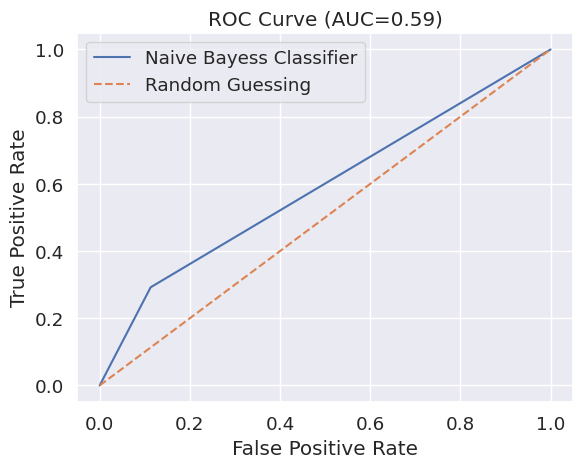

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y4_pred)
auc_score = roc_auc_score(y_test, y4_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC={:.2f})'.format(auc_score))
plt.legend(['Naive Bayess Classifier', 'Random Guessing'])
plt.show()

# **Evaluation des modèles** 

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

def kfold_cv(models, X, y, k):
    cv_results = {}
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    for model in models:
        scores = cross_val_score(model, X, y, cv=kf,scoring='recall') #le choix du score vient du fait qu'on veut maximiser le rappel
        cv_results[str(model.__class__.__name__)] = scores#{'mean': scores.mean()}
        
    return cv_results

In [ ]:
li = [clf,clf2,logreg1]
re = kfold_cv(li,X_test,y_test,10)
print(re)

{'DecisionTreeClassifier': array([0.68081181, 0.66573034, 0.70689655, 0.6497006 , 0.63271303,
       0.7325024 , 0.64739884, 0.68436019, 0.65      , 0.66824197]), 'RandomForestClassifier': array([0.70479705, 0.69662921, 0.70210728, 0.71656687, 0.68364349,
       0.71620326, 0.71194605, 0.70236967, 0.69215686, 0.67296786]), 'LogisticRegression': array([0.65682657, 0.66011236, 0.68965517, 0.6506986 , 0.65132223,
       0.69798658, 0.66570328, 0.68625592, 0.64901961, 0.66068053])}


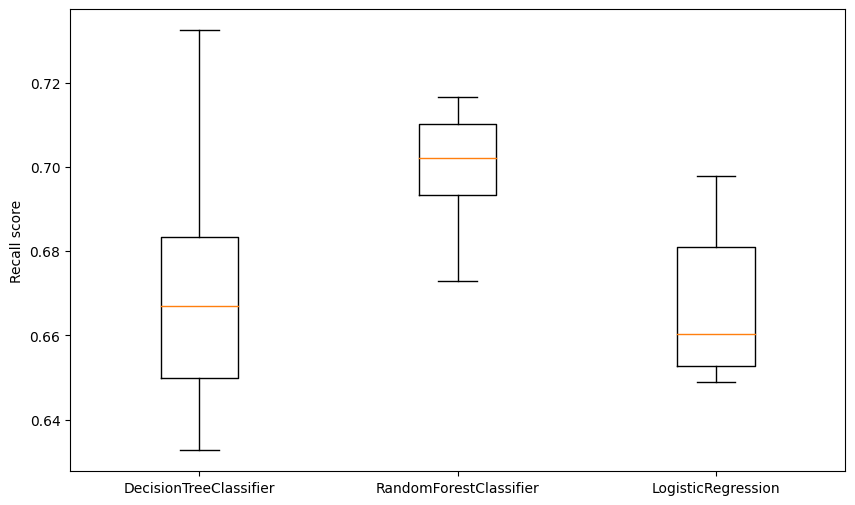

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(re.values())
ax.set_xticklabels(re.keys())
ax.set_ylabel('Recall score')
plt.show()

>Le modèle du RandomForest surpasse les autres modèles.

# **Optimisation du modèle sélectionné** 

Après avoir sélectionné un modèle en utilisant la validation croisée, l'étape suivante consiste à l'optimiser. Une façon d'optimiser un modèle est de régler ses hyperparamètres. Les hyperparamètres sont des paramètres qui ne sont pas appris à partir des données, mais plutôt définis par l'utilisateur avant l'entraînement du modèle.

In [ ]:
def ajuster_params(X_train, y_train, model , params):
    # Créer une instance de GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5)
    # Ajuster le modèle aux données d'entraînement
    grid_search.fit(X_train, y_train)
    # Retourner les meilleurs hyperparamètres trouvés
    return grid_search.best_params_

In [ ]:
# Definir les hyper parametres de random forest
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20]
}

best_params = ajuster_params(X_train,y_train,clf2,params)

Pour le paramètre n_estimators, nous avons choisi trois valeurs différentes, 50, 100 et 200. Ces valeurs sont couramment utilisées car elles sont suffisamment grandes pour que le modèle puisse avoir une représentation suffisamment complexe, mais pas trop grande pour éviter de surajuster les données d'entraînement.

Pour le paramètre max_depth, nous avons également choisi trois valeurs différentes, 5, 10 et 20. Encore une fois, ces valeurs ont été choisies pour trouver un bon compromis entre la complexité et la capacité de représentation du modèle. Une profondeur maximale trop grande peut entraîner un surajustement, tandis qu'une profondeur maximale trop faible peut conduire à un modèle trop simple qui ne peut pas bien représenter les données.

In [ ]:
print(best_params)

{'max_depth': 10, 'n_estimators': 200}


In [ ]:
clf2.set_params(**best_params)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [ ]:
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [ ]:
y_pred2=clf2.predict(X_test)

In [ ]:
print("Accuracy:", clf2.score(X_test, y_test))

Accuracy: 0.7358571428571429


In [ ]:
# y_test est la liste des vraies étiquettes de classe pour l'ensemble de test
# y_pred2 est la liste des prédictions du modèle pour l'ensemble de test

# Calculer la précision
precision2 = precision_score(y_test, y_pred2)

# Calculer le rappel
recall2 = recall_score(y_test, y_pred2)

# Calculer le F1-score
f12 = f1_score(y_test, y_pred2)

# Calculer l'AUC-ROC
auc_roc2 = roc_auc_score(y_test, y_pred2)

# Afficher les résultats
print("Precision: {:.2f}".format(precision2))
print("Recall: {:.2f}".format(recall2))
print("F1-score: {:.2f}".format(f12))
print("AUC-ROC: {:.2f}".format(auc_roc2))

Precision: 0.76
Recall: 0.68
F1-score: 0.72
AUC-ROC: 0.74


Les résultats avant et après la recherche de grille montrent une bonne amélioration des performances en générale notamment la précision, le F1-score et l'AUC-ROC du modèle, mais aussi une très faible 
baisse du rappel.